In [1]:
# 7-0, 7-3, 7-7, 7-19, 7-29, 7-41

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
import os
from surface_dynamics.all import *
from Library import *
from Library import Section
import math
from time import time
import copy
from scipy import integrate

import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify

In [2]:
def vectors(h, v, length = 256):
    from flatsurf import translation_surfaces
    S = SymmetricGroup(len(h))
    T = translation_surfaces.origami(S(h), S(v))
    T = T.erase_marked_points()
    from flatsurf.geometry.pyflatsurf_conversion import to_pyflatsurf
    TT = to_pyflatsurf(T)
    from pyflatsurf import flatsurf
    C = TT.connections().bound(flatsurf.Bound(length))
    connections = [vector((ZZ(str(c.vector().x())), ZZ(str(c.vector().y())))) for c in C]
    vecs = []
    for vec in connections:
        item = np.array([[vec[0]],[vec[1]]])
        vecs.append(item)
    print(len(vecs))
    return vecs

In [3]:
vecs0 = vectors("(1,2)(3,4)", "(1,3)(2,4)", 200)

/usr/local/mambaforge/envs/flatsurf/lib/python3.9/site-packages/cppyy/__init__.py:319: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources as pr


19088


In [4]:
#Code from Sunrose 
#Gives non-visibility tori for testing
D = OrigamiDatabase()
q = D.query()
qlist = q.list()

def unit_hor_saddle(O):
    count = 0
    for vert in O.vertices():
        tup = vert.up_right_tuple()
        for i in tup:
            for vert2 in O.vertices():
                tup2 = vert2.up_right_tuple()
                if O.r()(i) in tup2:
                    return True
    return False

def is_unobstructed(O):
    cusp_reps = O.teichmueller_curve().cusp_representatives()
    for item in cusp_reps:
        if not unit_hor_saddle(item[0]):
            return False
    return True

def obstructed(n, **kwargs):
    obstructed = []
    count_obstructed = 0
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            count_obstructed+= item.teichmueller_curve().orbit_graph().num_verts()
    return (obstructed, count_obstructed)

In [5]:
# list of permutations
def perms_list(n, **kwargs):
    obstructed = []
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            for perm in item.teichmueller_curve():
                obstructed.append(perm)
    return obstructed

In [4]:
# take files from saddle.py and load them into notebook
def load_arrays_from_file(file_path):
    # Load arrays from the NumPy file
    arrays_list = np.load(file_path, allow_pickle=True)
    
    # Ensure each element in the list is a NumPy array
    arrays_list = [np.array(array) for array in arrays_list]
    
    return arrays_list

In [18]:
# get list of permutations for STS with 7 squares
permutations = perms_list(7)
len(permutations)

92

In [27]:
h1 = str(perm1.r())
v1 = str(perm1.u())
for num in range(1, 7+1):
    if str(num) not in h1:
        h1 += "(" + str(num) + ")"
    if str(num) not in v1:
        v1 += "(" + str(num) + ")"

In [47]:
def are_conjugate_subgroups(G, H1, H2):
    # Iterate over all elements in G
    H2_set = set(H2)
    for g in G:
        # Check if conjugating H1 by g results in H2
        H1_conjugated = set(g*h*g.inverse() for h in H1)
        # Check if the sets H1_conjugated and H2 are identical
        if H1_conjugated == H2_set:
            return True
    return False

In [46]:
G = SymmetricGroup(4)
H1 = G.subgroup([G((1, 2, 3)), G((1, 2))])
H2 = G.subgroup([G((2, 3, 4)), G((2, 3))])

are_conjugate = are_conjugate_subgroups(G, H1, H2)
    
print(str(i) + ". Are the subgroups conjugate?", are_conjugate)

56. Are the subgroups conjugate? True


In [55]:
from sage.all import *
i = 0
for perm0 in permutations:
    h0 = str(perm0.r())
    v0 = str(perm0.u())
    for num in range(1, 7+1):
        if str(num) not in h0:
            h0 += "(" + str(num) + ")"
        if str(num) not in v0:
            v0 += "(" + str(num) + ")"

    G = SymmetricGroup(7)
    # Define two subgroups
    H1 = G.subgroup([G(h0), G(v0)])
    H2 = G.subgroup([G(h1), G(v1)])
    
    are_conjugate = are_conjugate_subgroups(G, H1, H2)
    
    print(str(i) + ". Are the subgroups conjugate?", are_conjugate)
    print(set(H1) == set(H2))
    print(perm0.veech_group())
    print()
    i+=1

0. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

1. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

2. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

3. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

4. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

5. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

6. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

7. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

8. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

9. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

10. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

11. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

12. Are the subgroups conjugate? True
True
Arithmetic subgroup of index 54

13. Are the subgroups 

In [54]:
H1

Subgroup generated by [(5,6,7), (1,2,3,4,5)] of (Symmetric group of order 7! as a permutation group)

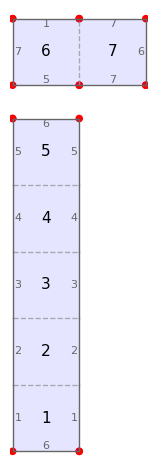

In [19]:
perm0 = permutations[0]
perm1 = permutations[1]
perm0.show()

In [ ]:
i = 0
for perm in permutations:
    print(str(i) + ". " + perm.veech_group())
    i+=1

In [13]:
vecs0 = load_arrays_from_file(os.path.join("vecs", "vecs7-1.npy"))
vecs1 = load_arrays_from_file(os.path.join("vecs", "vecs8-1.npy"))

In [10]:
len(vecs0)

19088

In [15]:
len(vecs1)

10336136

In [7]:
# load these values after kernel crashes
%store -r a
%store -r c
%store -r e
%store -r g
%store -r total
%store -r total_list
%store -r dfs

In [10]:
import pickle
with open(os.path.join("results", f"{7} - {0}", "setup.pkl"), 'rb') as f:
    loaded_data = pickle.load(f)
a,c,e,g = loaded_data

In [15]:
#Run computations for individual cusps and see if the output is decent
#j represents the jth cusps
#change i to get new output for the jth cusp

t0 = time()
i = 0
j = 0
n_squares = 7
dx = 0.0005
index = 0
vecs, x_vals, m0, m1, x0, y0, dx_y, z = setup(a[i][j], c[i][j], e[i][j], vecs0, dx, True)
df = winners(vecs, x_vals, m0, m1, y0, dx, dx_y)
tf = time()
print((tf-t0)/60**2)
# output is:
# number of vectors
# the x and y coords of the "section vector"
# poincare section plot


0.022007990611924065


[[1.0, 1.0]]


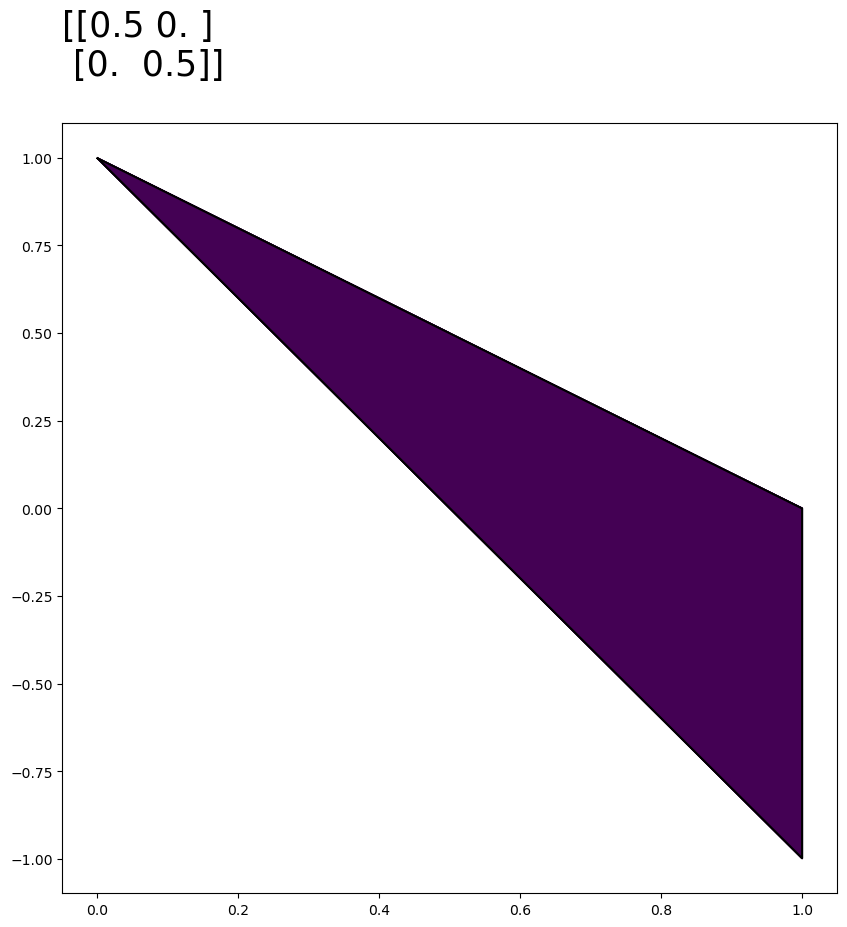

In [16]:
#plot the poincare section for the cusp represenation
plot(df, vecs, c[i][j], j, n_squares, index, test = True)

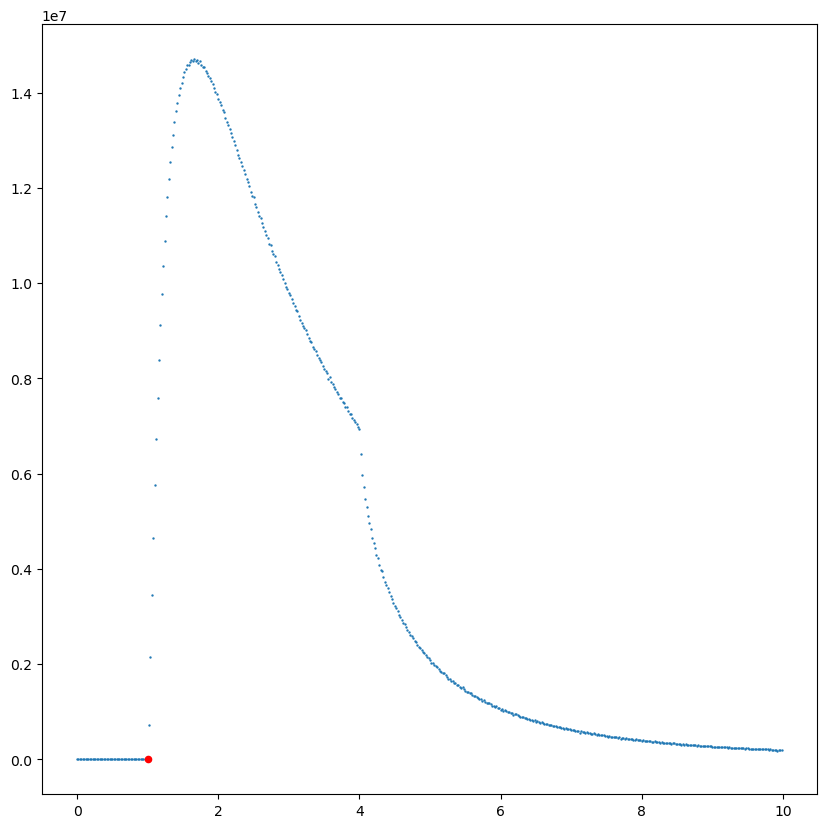

[0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,


<Figure size 640x480 with 0 Axes>

In [18]:
# plot the pdf for this cusp
sec_list = sec_setup(df, dx_y)
secs = sec_comp(sec_list, dx)
times = time_comp(secs)
pdf(list(df["time"]), times, dx*2, 7, 0, 0)
#plt.savefig(os.path.join("results", f"{n_squares} - {index}", f"pdf {j}"))

In [24]:
import dill
with open(os.path.join("results", f"{n_squares} - {index}", "secs - " + str(j) + ".dill"), 'wb') as f:
    dill.dump(secs, f)

with open(os.path.join("results", f"{n_squares} - {index}", "secs - " + str(j) + ".dill"), 'rb') as f:
    # Load the object from the file
    data = dill.load(f)

# Now, 'data' contains the object loaded from the file

In [26]:
secs

In [21]:
sum = 0
for i in range(len(secs)):

    all_points = []
    for item in secs[i].points_top:
        all_points.append(item)
    for item in secs[i].points_bottom:
        all_points.append(item)
        
    all_points = set(all_points)
    all_points = list(all_points)
    all_points.sort()
    
    m = 0
    n = 0
    for k in range (1, len(all_points)):
        if (not(all_points[k-1] >= secs[i].points_top[m] and all_points[k] <= secs[i].points_top[m+1])):
            m += 1
        if (not(all_points[k-1] >= secs[i].points_bottom[n] and all_points[k] <= secs[i].points_bottom[n+1])):
            n += 1
        top_eq = secs[i].f_top[m]
        bottom_eq = secs[i].f_bottom[n]
        upper = all_points[k]
        lower = all_points[k-1]
        
        # Perform the double integral
        f = lambda y,x :secs[i].vec[1][0] / (x * (secs[i].vec[0][0] * x + secs[i].vec[1][0] * y))
        result, error = integrate.dblquad(f, lower, upper, lambda x: bottom_eq(x), lambda x: top_eq(x)) 
        sum += result



In [60]:
y0

NameError: name 'y0' is not defined

In [23]:
total += sum
total_list.append(sum)
dfs.append(df)
sum, total

(2.9666252154358923, 74.09803220722011)

In [24]:
len(dfs)

9

In [25]:
total_list

[3.270660816958084,
 7.558680007194885,
 3.266718239620887,
 9.747350293739638,
 4.8934849419535285,
 6.4731295892115845,
 21.91695097206407,
 14.004432131041538,
 2.9666252154358923]

In [26]:
%store total
%store total_list
%store dfs

Stored 'total' (float)
Stored 'total_list' (list)
Stored 'dfs' (list)


In [39]:
#total = 0
#total_list = []
#dfs = []

In [ ]:
dx = 0.0005
total_pdf = pdf(list(dfs[0]["time"]), [0,1], dx)
pdf_list = []
pdf_list.append(total_pdf)
for i in range(1, len(dfs)):
    curr = pdf(list(dfs[i]["time"]), [0,1], dx)
    pdf_list.append(curr)

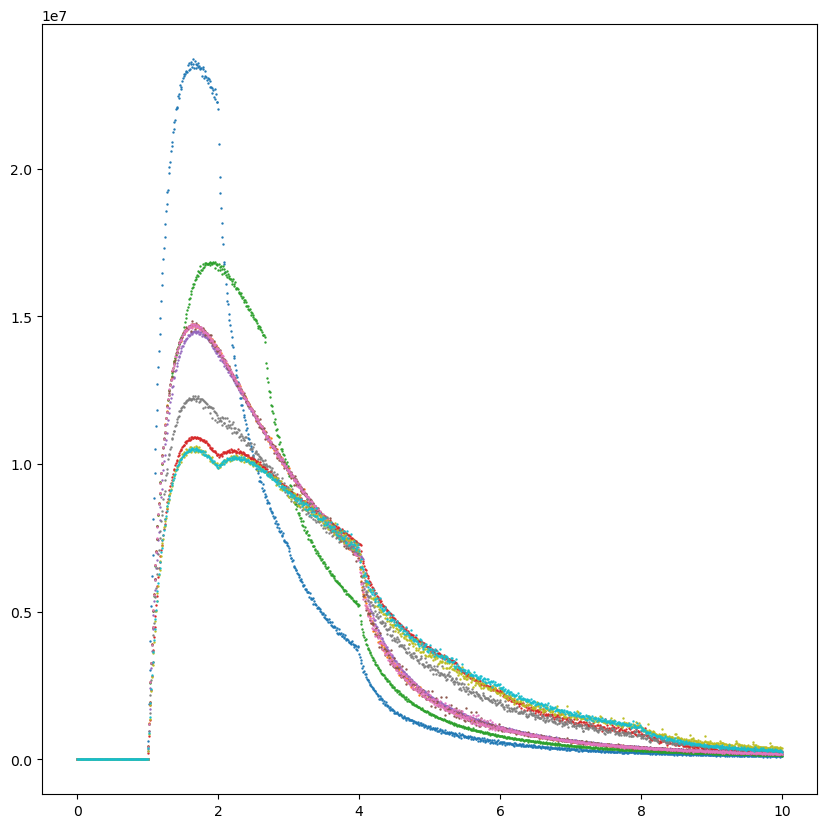

In [15]:
times = list(np.arange(0, 10, 20*dx))
fig, ax = plt.subplots(figsize=(10, 10))
for pdf in pdf_list:
    ax.scatter(times, pdf, s = 0.5)

In [79]:
total_pdf = copy.deepcopy(pdf_list[9])
for i in range(len(total_pdf)):
    total_pdf[i] = total_pdf[i] + pdf_list[8][i]
for i in range(len(total_pdf)):
    total_pdf[i] = total_pdf[i] + pdf_list[7][i]
for i in range(len(total_pdf)):
    total_pdf[i] = total_pdf[i] + pdf_list[0][i]
for i in range(len(total_pdf)):
    total_pdf[i] = total_pdf[i] + pdf_list[2][i]
for i in range(len(total_pdf)):
    total_pdf[i] = total_pdf[i] + pdf_list[3][i]

total_pdf2 = copy.deepcopy(pdf_list[5])
for j in range(15):
    for i in range(len(total_pdf2)):
        total_pdf2[i] = total_pdf2[i] + pdf_list[1][i]

total_pdf3 = copy.deepcopy(pdf_list[1])
for j in range(5):
    for i in range(len(total_pdf2)):
        total_pdf3[i] = total_pdf3[i] + pdf_list[1][i]

#total_pdf3 = copy.deepcopy(pdf_list[0])
#for j in range(4):
#    for i in range(len(total_pdf3)):
#        total_pdf3[i] = total_pdf3[i] + pdf_list[0][i]
        
#for j in range(4):
 #   for i in range(len(total_pdf)):
  #      total_pdf[i] = total_pdf[i] + pdf_list[5][i]

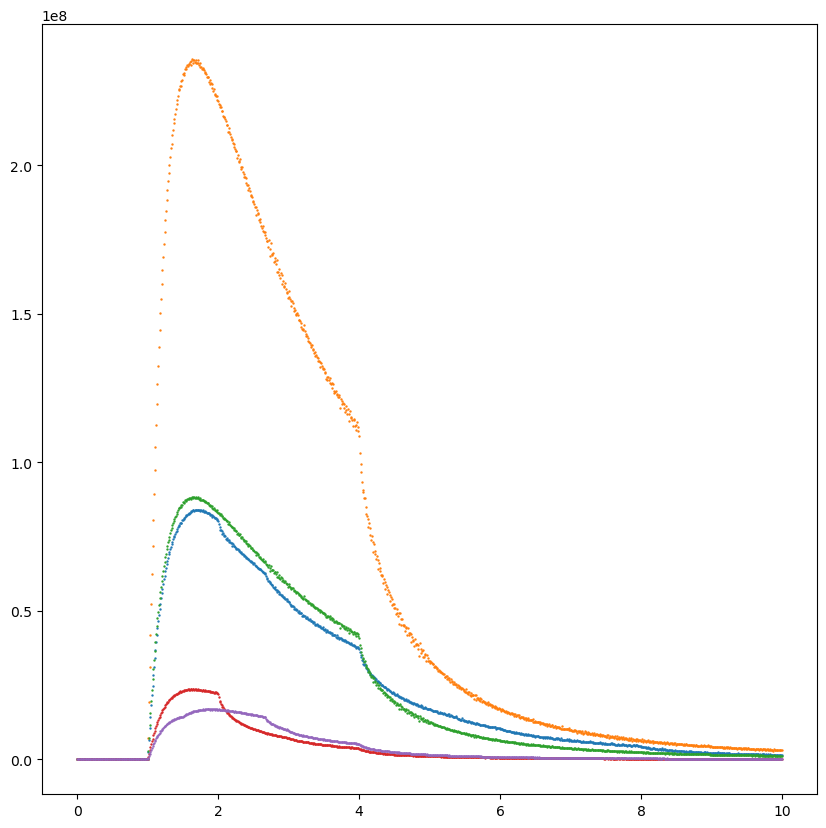

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(times, total_pdf, s = 0.5)
ax.scatter(times, total_pdf2, s = 0.5)
ax.scatter(times, total_pdf3, s = 0.5)
ax.scatter(times, pdf_list[0], s = 0.5)
ax.scatter(times, pdf_list[2], s = 0.5)

In [11]:
# For an STS, repeatedly run the poincare_details function and get the 
#different representations of cusps and other values and store them in lists
#takes awhile
a = []
c = []
e = []
g = []
for i in range(5):
    try:
        alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs = poincare_details(perm, vecs0)
    except:
        print("nay")
        continue
    a.append(alphas)
    c.append(Cs)
    e.append(eigenvecs)
    g.append(generators)

In [12]:
c

[[array([[0.5, 0. ],
         [0. , 0.5]])],
 [array([[0.5, 0. ],
         [0. , 0.5]])],
 [array([[0.5, 0. ],
         [0. , 0.5]])],
 [array([[0.5, 0. ],
         [0. , 0.5]])],
 [array([[0.5, 0. ],
         [0. , 0.5]])]]

In [28]:
# store these values in case kernel crashes
%store a
%store c
%store e
%store g

Stored 'a' (list)
Stored 'c' (list)
Stored 'e' (list)
Stored 'g' (list)


In [16]:
def poincare_details(perm, vecs0):
    #find the generators of each cusp of the STS
    generators = []
    a = perm.veech_group().cusps()
    for item in a:
        m = perm.veech_group().cusp_data(item)[0]
        generators.append(m.matrix())
        break
    #find the eigenvectors for each generator and make sure they are 1
    eigs = []
    for matrix in generators:
        eig1, eig2 = matrix.eigenvalues()
        if eig1 == eig2:
            if eig1 == 1:
                eigs.append(eig1)
            else:
                raise ValueError("Eigenvalue not equal to 1")
        else:
            raise ValueError("Different eigenvalues")
    #find the eigenvectors for each generator
    eigenvecs = []
    for matrix in generators:
        vec = matrix.eigenvectors_right()[0][1][0]
        vec = np.array([[vec[0]],[vec[1]]])
        eigenvecs.append(vec)
    #find the magnitude, slope, x-direction, and y-direction of each eigenvector
    saddle_vecs = []
    for vec in eigenvecs:
        mag_vec = ((vec[0]**2 + vec[1]**2)**0.5)[0]
        if vec[0] == 0:
            slope_vec = float("inf")
        else:
            slope_vec = (vec[1]/vec[0])[0]

        if vec[0] >= 0:
            x_sign_vec = 1
        else:
            x_sign_vec = -1
        if vec[1] >= 0:
            y_sign_vec = 1
        else:
            y_sign_vec = -1

        saddle_vec = None
        check = 0

        #find the magnitude, slope, x-direction, and y-direction of each saddle connection
        for saddle in vecs0:
            mag_saddle = ((saddle[0]**2 + saddle[1]**2)**0.5)[0]
            if saddle[0] == 0:
                slope_saddle = float("inf")
            else:
                slope_saddle = (saddle[1]/saddle[0])[0]

            if saddle[0] >= 0:
                x_sign_saddle = 1
            else:
                x_sign_saddle = -1
            if saddle[1] >= 0:
                y_sign_saddle = 1
            else:
                y_sign_saddle = -1

            #find the smallest saddle connection that is in the same direction and has the same slope as the given eigenvector and add it to a list
            if slope_vec == slope_saddle:
                if x_sign_vec == x_sign_saddle:
                    if y_sign_vec == y_sign_saddle:
                        if check == 0:
                            saddle_vec = saddle
                            mag = mag_saddle
                            check += 1
                        elif mag_saddle < mag:
                            saddle_vec = saddle
                            mag = mag_saddle
        if check == 0:
            raise ValueError(f"No saddle vec for eigenvector {vec}")
        saddle_vecs.append(saddle_vec)
    #find the counter-clockwise angle from the x-axis to the eigenvectors
    thetas = []
    for i in range(len(saddle_vecs)):
        mag = (saddle_vecs[i][0]**2 + saddle_vecs[i][1]**2)**0.5
        theta = np.arccos(np.dot(np.array([[1,0]]),saddle_vecs[i])/mag)
        if saddle_vecs[i][1] < 0:
            theta = 2 * math.pi - theta
        thetas.append(theta)
    #find the rotation matrix that takes the vector (1,0) to the vector in the direction of each eigenvector
    rots = []
    for theta in thetas:
        rot = np.array([[round(np.cos(theta)[0][0],5),round(-np.sin(theta)[0][0],5)],[round(np.sin(theta)[0][0],5), round(np.cos(theta)[0][0],5)]])
        rots.append(rot)

    #find a constant value such that mult*rot@(1,0) = saddle_vec while accounting for rounding errors and zero matrix inputs
    mults = []
    for i in range(len(rots)):
        matrix = rots[i]@np.array([[1],[0]])
        if matrix[0][0] != 0:
            mult1 = saddle_vecs[i][0][0]/matrix[0][0]
        else:
            mult1 = 0
        if matrix[1][0] != 0:
            mult2 = saddle_vecs[i][1][0]/matrix[1][0]
        else:
            mult2 = 0
        if mult1 != 0 and mult2 == 0:
            mult = mult1
        elif mult1 == 0 and mult2 != 0:
            mult = mult2
        elif mult1 == 0 and mult2 == 0:
            raise ValueError('both mults equal zero')
        elif abs(mult1 - mult2) <= 0.001:
            mult = mult1
        elif abs(mult1 - mult2) >= 0.001:
            raise ValueError(f'mults are different {mult1}, {mult2}')
        mults.append(mult)
        mult1 = None
        mult2 = None
        mult = None
    #find c_inv and c
    Cs = []
    C_invs = []
    for i in range(len(mults)):
        c_inv = mults[i]*rots[i]
        c = np.linalg.inv(c_inv)
        Cs.append(c)
        C_invs.append(c_inv)
    #alpha is the top right value of the matrix M = c @ generator @ c_inv. M must have 1s on the diagonal and 0 in the bottom left
    alphas = []
    Ms = []
    for i in range(len(generators)):
        M = Cs[i]@generators[i]@C_invs[i]
        Ms.append(M)
        if M[1][0] >= 1/1000000 and M[1][0] <= -1/1000000:
            raise ValueError(f"Wrong conjugate matrix\nC: {Cs[i]}\nC_inv: {C_invs[i]}\nM: {M}\ngenerator: {generators[i]}")
        alphas.append(round(M[0][1], 5))
    return alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs

In [17]:
def vectors(h, v, length = 256):
    from flatsurf import translation_surfaces
    S = SymmetricGroup(20)
    T = translation_surfaces.origami(h, v)
    T = T.erase_marked_points()
    from flatsurf.geometry.pyflatsurf_conversion import to_pyflatsurf
    TT = to_pyflatsurf(T)
    from pyflatsurf import flatsurf
    C = TT.connections().bound(flatsurf.Bound(length))
    connections = [vector((ZZ(str(c.vector().x())), ZZ(str(c.vector().y())))) for c in C]
    vecs = []
    for vec in connections:
        item = np.array([[vec[0]],[vec[1]]])
        vecs.append(item)
    print(len(vecs))
    return vecs

30140
2493
1.0 1.0
1
3
[array([[0.],
       [1.]]), array([[1.],
       [1.]]), array([[2.],
       [1.]]), array([[3.],
       [1.]])]
29324
2375
1.0 2.0
1
3
[array([[1.],
       [2.]]), array([[2.],
       [2.]]), array([[2.],
       [3.]]), array([[3.],
       [2.]])]
29026
2340
1.0 1.0
1
3
[array([[0.],
       [1.]]), array([[1.],
       [1.]]), array([[2.],
       [1.]]), array([[4.],
       [1.]]), array([[5.],
       [1.]]), array([[5.],
       [2.]]), array([[6.],
       [2.]]), array([[8.],
       [3.]])]
29324
2375
1.0 0.5
1
3
[array([[0. ],
       [0.5]]), array([[1. ],
       [0.5]]), array([[1.5],
       [0.5]]), array([[2. ],
       [0.5]]), array([[2.5],
       [0.5]]), array([[3. ],
       [0.5]]), array([[3.5],
       [0.5]]), array([[4. ],
       [0.5]]), array([[5. ],
       [0.5]]), array([[6. ],
       [0.5]]), array([[7. ],
       [0.5]]), array([[8. ],
       [0.5]]), array([[8.5],
       [1. ]]), array([[10. ],
       [ 0.5]]), array([[12.5],
       [ 0.5]]), ar

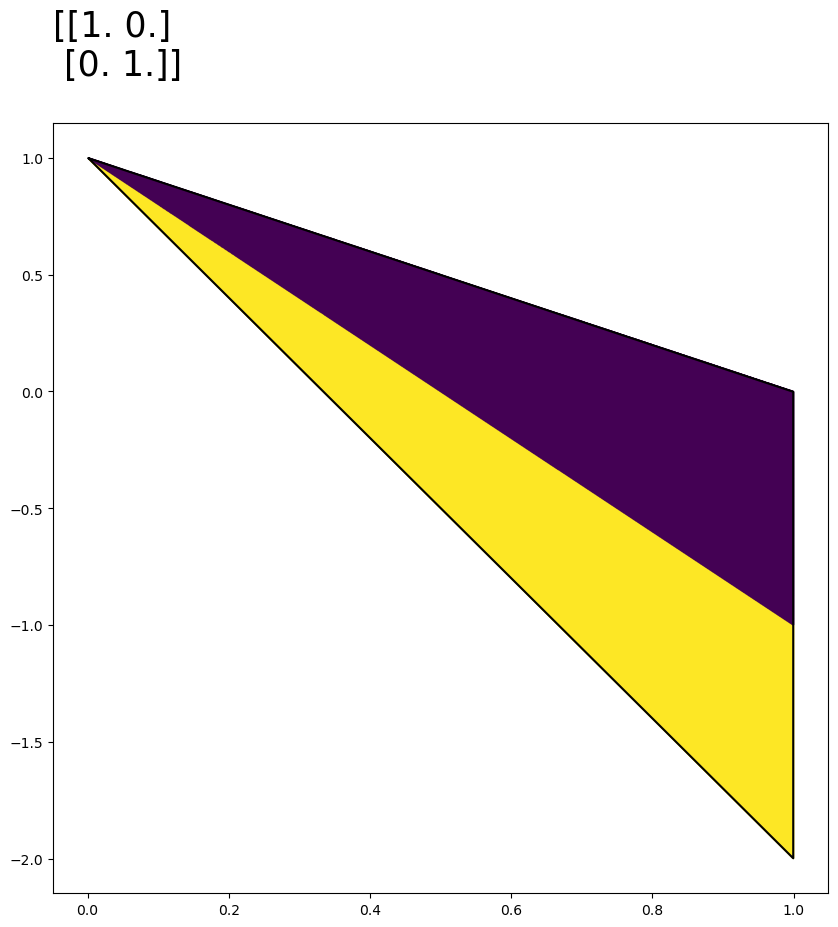

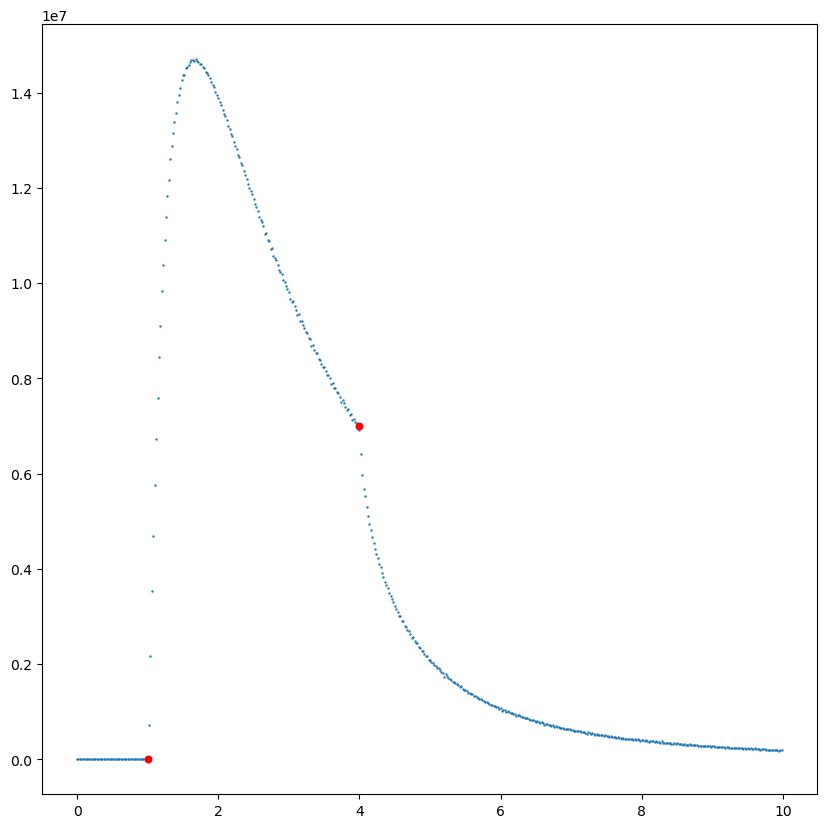

Error in callback <function flush_figures at 0x7fc5fde07700> (for post_execute):


In [ ]:
pdf_list = []
all_secs = []
K = [0, 3, 7, 19, 29, 41]
for k in  K:
    perm = perms_list(7)[k]
    vs = vectors(perm.r(), perm.u(), 100)
    vectors0 = []
    for v in vs:
        if v[0][0] <= 50 and v[0][0] >= 0 and v[1][0] <= 50 and v[1][0] >= 0:
            vectors0.append(v)
    alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs = poincare_details(perm, vectors0)
    
    n_squares = 7
    dx = 0.0005
    index = k
    k += 1
    vecs, x_vals, m0, m1, x0, y0, dx_y = setup(alphas[0], Cs[0], eigenvecs[0], vectors0, dx, True)
    df = winners(vecs, x_vals, m0, m1, y0, dx, dx_y)

    try:
        plot(df, vecs, Cs[0], 0, n_squares, index, test = False)
    
        sec_list = sec_setup(df, dx_y)
        secs = sec_comp(sec_list, dx)
        all_secs.append(secs)
        prob_times = time_comp(secs)
        curr = pdf(list(df["time"]), prob_times, dx*2)
        pdf_list.append(curr)
        plt.savefig(os.path.join("results", f"{n_squares} - {index}", f"pdf {0}"))
    except:
        continue

In [ ]:
for j in range(len(all_secs)):
    for i in range(len(secs)):
        print()
        print(secs[i].vec)
        print(secs[i].top, secs[i].points_top)
        print(secs[i].bottom, secs[i].points_bottom)

In [59]:
for i in range(100):
    continue

In [68]:
i = 0
j = 1
dx = 0.005
vecs, x_vals, m0, m1, x0, y0, dx_y = setup(a[i][j], c[i][j], e[i][j], vecs1, dx, False)

IndexError: list index out of range

In [67]:
type(y0)

<class 'int'>

[[7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0],
 [7.0]]

In [13]:
global t_dict
t_dict = {}

x, y, t = sym.symbols('x y t')
Mab = np.array([[x, y], [0, 1/x]])
horo = np.array([[1, 0], [-t, 1]])

for i in range(len(vecs0)):
    #apply Mab matrix, perform horocycle flow and find time t to horizontal
    a = horo@(Mab@vecs0[i])
    t_solution = solve(a[1][0], t)[0]
    # Lambdify the solution
    t_dict[i] = lambdify([x, y], t_solution)

KeyboardInterrupt: 

In [6]:
perm = perms_list(7)[0]

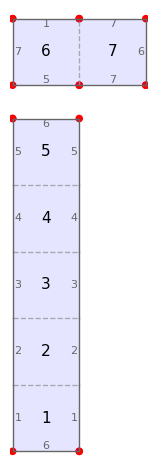

In [7]:
perm.show()

In [8]:
perm.cylinder_decomposition()

[([(1, 6)], [(6, 5)], 1, 5, 0, 0),
 ([(6, 5), (7, 7)], [(7, 7), (1, 6)], 2, 1, 0, 0)]

In [10]:
perm.cylinder_diagram()

(0)-(1) (1,2)-(0,2)

In [11]:
perm.num_cylinders()

2